In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%%capture
import os
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
    !pip install --no-deps bitsandbytes accelerate xformers==0.0.29 peft trl triton
    !pip install --no-deps cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf datasets huggingface_hub hf_transfer
    !pip install --no-deps unsloth

In [3]:
from unsloth import FastVisionModel

model,tokenizer = FastVisionModel.from_pretrained(
    "Qwen/Qwen2.5-VL-3B-Instruct",
    load_in_4bit = True,
    use_gradient_checkpointing= "unsloth"
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


2025-07-21 05:58:49.971369: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753077530.163796      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753077530.219244      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.7.5: Fast Qwen2_5_Vl patching. Transformers: 4.52.4.
   \\   /|    Tesla T4. Num GPUs = 2. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/3.79G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


chat_template.json: 0.00B [00:00, ?B/s]

In [4]:
tokenizer

Qwen2_5_VLProcessor:
- image_processor: Qwen2VLImageProcessor {
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "Qwen2VLImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "max_pixels": 12845056,
  "merge_size": 2,
  "min_pixels": 3136,
  "patch_size": 14,
  "processor_class": "Qwen2_5_VLProcessor",
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "longest_edge": 12845056,
    "shortest_edge": 3136
  },
  "temporal_patch_size": 2
}

- tokenizer: Qwen2TokenizerFast(name_or_path='unsloth/qwen2.5-vl-3b-instruct-unsloth-bnb-4bit', vocab_size=151643, model_max_length=128000, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'eos_token': '<|im_end|>', 'pad_token': '<|vision_pad|>', 'additional_special_tokens': ['<|im_start|>', '<|im_end|>', '<|object_ref_start|>', '<|

In [5]:
! nvidia-smi

Mon Jul 21 05:59:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P0             26W /   70W |    3837MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
model

Qwen2_5_VLForConditionalGeneration(
  (model): Qwen2_5_VLModel(
    (visual): Qwen2_5_VisionTransformerPretrainedModel(
      (patch_embed): Qwen2_5_VisionPatchEmbed(
        (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
      )
      (rotary_pos_emb): Qwen2_5_VisionRotaryEmbedding()
      (blocks): ModuleList(
        (0-31): 32 x Qwen2_5_VLVisionBlock(
          (norm1): Qwen2RMSNorm((1280,), eps=1e-06)
          (norm2): Qwen2RMSNorm((1280,), eps=1e-06)
          (attn): Qwen2_5_VLVisionSdpaAttention(
            (qkv): Linear(in_features=1280, out_features=3840, bias=True)
            (proj): Linear(in_features=1280, out_features=1280, bias=True)
          )
          (mlp): Qwen2_5_VLMLP(
            (gate_proj): Linear(in_features=1280, out_features=3420, bias=True)
            (up_proj): Linear(in_features=1280, out_features=3420, bias=True)
            (down_proj): Linear(in_features=3420, out_features=1280, bias=True)
            (act_fn): Si

In [7]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers = True,
    finetune_language_layers = True,
    finetune_attention_modules = True,
    finetune_mlp_modules = True,
    r = 32,
    lora_alpha = 32,
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,
    loftq_config = None,
)

In [8]:
model

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): Qwen2_5_VLForConditionalGeneration(
      (model): Qwen2_5_VLModel(
        (visual): Qwen2_5_VisionTransformerPretrainedModel(
          (patch_embed): Qwen2_5_VisionPatchEmbed(
            (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
          )
          (rotary_pos_emb): Qwen2_5_VisionRotaryEmbedding()
          (blocks): ModuleList(
            (0-31): 32 x Qwen2_5_VLVisionBlock(
              (norm1): Qwen2RMSNorm((1280,), eps=1e-06)
              (norm2): Qwen2RMSNorm((1280,), eps=1e-06)
              (attn): Qwen2_5_VLVisionSdpaAttention(
                (qkv): lora.Linear(
                  (base_layer): Linear(in_features=1280, out_features=3840, bias=True)
                  (lora_dropout): ModuleDict(
                    (default): Identity()
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=1280, out_features=32, bias=

In [9]:
from datasets import load_dataset

ds = load_dataset("katanaml-org/invoices-donut-data-v1")

README.md: 0.00B [00:00, ?B/s]

(…)-00000-of-00001-a5c51039eab2980a.parquet:   0%|          | 0.00/167M [00:00<?, ?B/s]

(…)-00000-of-00001-b8a5c4a6237baf25.parquet:   0%|          | 0.00/19.9M [00:00<?, ?B/s]

(…)-00000-of-00001-56af6bd5ff7eb34d.parquet:   0%|          | 0.00/10.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/425 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/50 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/26 [00:00<?, ? examples/s]

In [10]:
schema_dict = {
    "header": {
        "invoice_no": "Invoice number of the document",
        "invoice_date": "Date when the invoice was issued",
        "seller": "Full address and name of the seller",
        "client": "Full address and name of the client",
        "seller_tax_id": "Tax identification number of the seller",
        "client_tax_id": "Tax identification number of the client",
        "iban": "Bank IBAN number of the seller"
    },
    "items": [
        {
            "item_desc": "Description of the service or product sold",
            "item_qty": "Quantity of the item (usually in units or pieces)",
            "item_net_price": "Unit price excluding VAT",
            "item_net_worth": "Total price excluding VAT",
            "item_vat": "VAT rate applied to this item",
            "item_gross_worth": "Total price including VAT"
        }
    ],
    "summary": {
        "total_net_worth": "Total net amount before VAT",
        "total_vat": "Total VAT amount",
        "total_gross_worth": "Final total amount including VAT"
    }
}

In [11]:
import json
instruction = f"""You are a specialized in invoice and your role is to extract information from any invoice that is provided to you in the following valid json format. if the corresponding value is not present, leave the key with empty string.

{json.dumps(schema_dict)}

Fill the keys only when the information is available.
"""

In [12]:
def convert_to_conversation(sample):
    conversation = [
        {
            "role": "user",
            "content": [
                {"type": "text","text": instruction},
                {"type": "image","image": sample["image"]}
            ]
        },
        {
            "role": "assistant",
            "content": [
                {"type": "text","text": sample["ground_truth"]}
            ]
        }
    ]
    return {"messages": conversation}

In [13]:
from tqdm import tqdm
converted_dataset_train = []

for sample in tqdm(ds['train']):
    sample["ground_truth"] = json.dumps(json.loads(sample["ground_truth"])["gt_parse"])
    sample["image"] = sample["image"].resize((640,640))
    converted_dataset_train.append(convert_to_conversation(sample))

100%|██████████| 425/425 [00:46<00:00,  9.05it/s]


In [14]:
converted_dataset_valid = []
for sample in tqdm(ds['validation']):
    sample['ground_truth'] = json.dumps(json.loads(sample['ground_truth'])["gt_parse"])
    sample['image'] = sample['image'].resize((640,640))
    converted_dataset_valid.append(convert_to_conversation(sample))

100%|██████████| 50/50 [00:05<00:00,  9.12it/s]


In [15]:
converted_dataset_train[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'You are a specialized in invoice and your role is to extract information from any invoice that is provided to you in the following valid json format. if the corresponding value is not present, leave the key with empty string.\n\n{"header": {"invoice_no": "Invoice number of the document", "invoice_date": "Date when the invoice was issued", "seller": "Full address and name of the seller", "client": "Full address and name of the client", "seller_tax_id": "Tax identification number of the seller", "client_tax_id": "Tax identification number of the client", "iban": "Bank IBAN number of the seller"}, "items": [{"item_desc": "Description of the service or product sold", "item_qty": "Quantity of the item (usually in units or pieces)", "item_net_price": "Unit price excluding VAT", "item_net_worth": "Total price excluding VAT", "item_vat": "VAT rate applied to this item", "item_gross_worth": "Total price including VAT"}

In [16]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.2/676.2 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 16.8 MB/s eta 0:00:00


In [17]:
import mlflow

In [18]:
import os
import wandb

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()

secret_value_1 = user_secrets.get_secret("WANDB_API_KEY")


wandb.login(key=secret_value_1)


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: adarshghimire10 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [19]:
from transformers import TrainerCallback
import torch
import wandb
from PIL import Image
import random

class LogSampleCallback(TrainerCallback):
    def __init__(self, dataset, tokenizer, model, log_every_n_steps=100):
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.model = model
        # self.instruction = instruction
        self.log_every_n_steps = log_every_n_steps

    def on_step_end(self, args, state, control, **kwargs):
        if state.global_step % self.log_every_n_steps == 0:
            # Random sampling one from dataset
            sample = random.choice(self.dataset)

            image = sample['messages'][0]['content'][1]['image']
            prompt = sample['messages'][0]['content'][0]['text']
            target = sample['messages'][1]['content'][0]['text']

            # image preprocessing 
            if not isinstance(image, Image.Image):
                image = image.resize((640, 640))  

            messages = [
                {"role": "user", "content": [
                    {"type": "image"}
                ]}
            ]

            input_text = self.tokenizer.apply_chat_template(messages, add_generation_prompt=True)
            inputs = self.tokenizer(
                image,
                input_text,
                add_special_tokens=False,
                return_tensors="pt"
            ).to("cuda")

            with torch.no_grad():
                outputs = self.model.generate(**inputs, max_new_tokens=1024,
                                              use_cache=True, temperature=0.1, min_p=0.1)
                prediction = self.tokenizer.decode(outputs[0], skip_special_tokens=True)

            # Log to wandb
            wandb.log({
                "val/image": wandb.Image(image,caption=f"Ground Truth:\n{target}\n\nPrediction:\n{prediction}"),
            }, step=state.global_step)


In [20]:
import os
from unsloth import is_bf16_supported
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

os.environ["WANDB_PROJECT"] = "qwen-vl-3b-finetuning"

FastVisionModel.for_training(model)

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer),
    train_dataset = converted_dataset_train,
    eval_dataset = converted_dataset_valid,  
    args = SFTConfig(
        per_device_train_batch_size = 1,
        gradient_accumulation_steps = 1,
        warmup_steps = 5,
        num_train_epochs = 3,
        learning_rate = 2e-4,
        fp16 = not is_bf16_supported(),
        bf16 = is_bf16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "wandb",
        run_name = "qwen-2.5-vl-7b-cord",
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        dataset_num_proc = 4,
        max_seq_length = 1024,

        save_strategy="steps",
        save_steps=200,
    ),
    callbacks=[LogSampleCallback(converted_dataset_valid, tokenizer, model, log_every_n_steps=200)]
)


Unsloth: Model does not have a default image size - using 512


In [21]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 425 | Num Epochs = 3 | Total steps = 639
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 1
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 1 x 1) = 2
 "-____-"     Trainable parameters = 82,169,856 of 3,836,792,832 (2.14% trained)
wandb: WARNING Changes to your `wandb` environment variables will be ignored because your `wandb` session has already started. For more information on how to modify your settings with `wandb.init()` arguments, please refer to https://wandb.me/wandb-init.
wandb: Tracking run with wandb version 0.20.1
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250721_060107-tcvw2k78
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run qwen-2.5-vl-7b-cord
wandb: ⭐️ View project at https://wandb.ai/adarshghimire10/qwen-vl-3b-finetuning
wandb: 🚀 View run at https://wandb.ai/adarshghimire10/qwen-vl-3b-finetuning/r

Step,Training Loss
1,1.420400
2,1.153600
3,1.015600
4,0.994800
5,0.709700
6,0.773900
7,0.724600
8,0.596500
9,0.593700
10,0.461200


Unsloth: Will smartly offload gradients to save VRAM!


wandb: WARNING The get_url method is deprecated and will be removed in a future release. Please use `run.url` instead.


In [22]:
import torch

FastVisionModel.for_inference(model) # Enable for inference!

image = ds['test'][5]["image"].resize((640,640))
# instruction = "Write the LaTeX representation for this image."
torch.cuda.empty_cache()

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 1024,
                   use_cache = True, temperature = 0.1, min_p = 0.1)

{"header": {"invoice_no": "27543706", "invoice_date": "07/20/2020", "seller": "Kaizer, Hays and Cook 460 Richard Forge Lake Maria, CA 86826", "client": "Holland PLC 10833 Hill Courts Suite 606 Collinsland, CA 60385", "seller_tax_id": "980-78-9083", "client_tax_id": "998-85-0115", "iban": "GB82GOCR29918894344551"}, "items": [{"item_desc": "Marble Beautiful White Coffee Table Top Malachite Inlay Art Historic Home Decor H5372", "item_qty": "5,00", "item_net_price": "271,01", "item_net_worth": "1355,05", "item_vat": "10%", "item_gross_worth": "1 490,55"}, {"item_desc": "15\"x15\" White Decorative Coffee Table Top Lapis Lazuli Marquetry Patio Table", "item_qty": "4,00", "item_net_price": "645,77", "item_net_worth": "2 583,08", "item_vat": "10%", "item_gross_worth": "2 841,39"}, {"item_desc": "16 Inches White Coffee Table Top Inlay with Multi Stone at Border Game Table", "item_qty": "1,00", "item_net_price": "280,50", "item_net_worth": "280,50", "item_vat": "10%", "item_gross_worth": "308,55

In [23]:
ds['test'][0]['ground_truth']

'{"gt_parse": {"header": {"invoice_no": "97159829", "invoice_date": "09/18/2015", "seller": "Bradley-Andrade 9879 Elizabeth Common Lake Jonathan, RI 12335", "client": "Castro PLC Unit 9678 Box 9664 DPO AP 69387", "seller_tax_id": "985-73-8194", "client_tax_id": "994-72-1270", "iban": "GB81LZWO32519172531418"}, "items": [{"item_desc": "12\\" Marble Lapis Inlay Chess Table Top With 2\\" Pieces & 15\\" Wooden Stand W537", "item_qty": "2,00", "item_net_price": "444,60", "item_net_worth": "889,20", "item_vat": "10%", "item_gross_worth": "978,12"}], "summary": {"total_net_worth": "$ 889,20", "total_vat": "$ 88,92", "total_gross_worth": "$ 978,12"}}}'

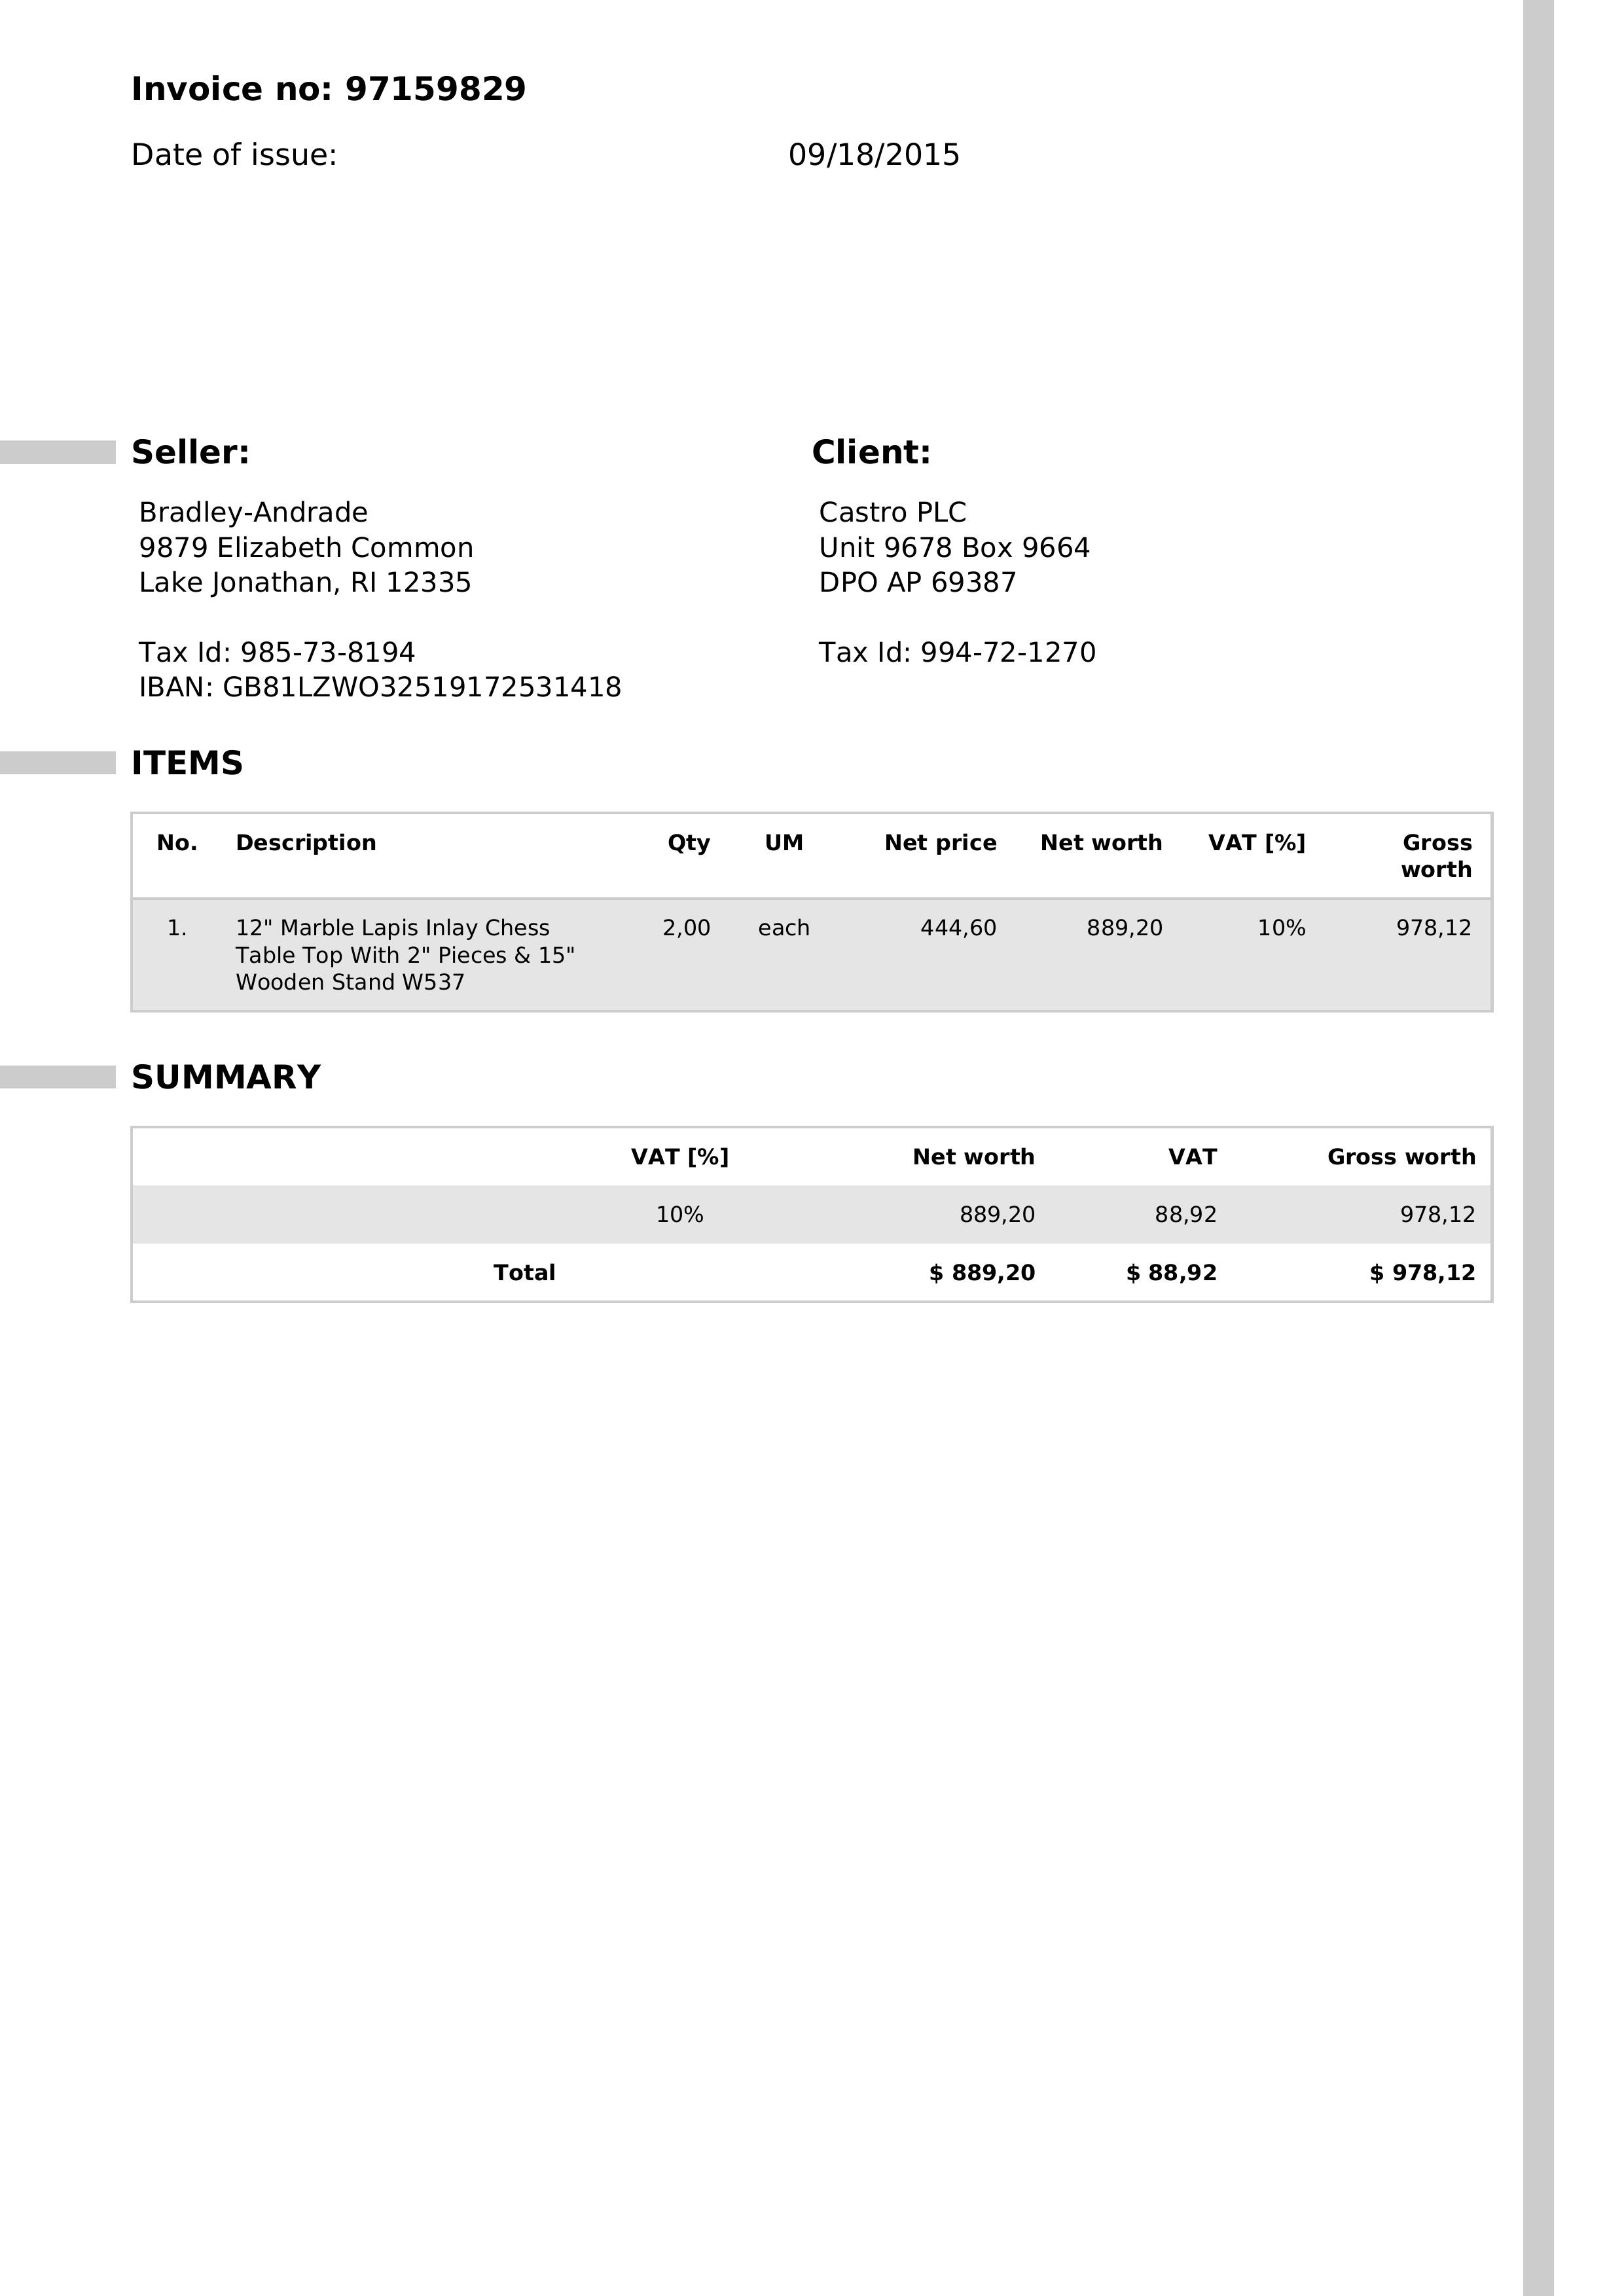

In [24]:
ds['test'][0]['image']

In [25]:
model.save_pretrained("lora_model")  # Local saving
tokenizer.save_pretrained("lora_model")

[]

In [26]:
from huggingface_hub import login
secret_value_0 = user_secrets.get_secret("HUGGINGFACE_TOKEN")
login(token=secret_value_0)

In [27]:
model.push_to_hub_merged("Adarsh203/qwen-2.5-vl-3b-invoices", tokenizer, private=True)

  0%|          | 0/1 [00:00<?, ?it/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

Found HuggingFace hub cache directory: /root/.cache/huggingface/hub
Checking cache directory for required files...
Cache check failed: model-00001-of-00002.safetensors not found in local cache.
Not all required files found in cache. Will proceed with downloading.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Unsloth: Merging weights into 16bit:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Unsloth: Merging weights into 16bit:  50%|█████     | 1/2 [01:40<01:40, 100.81s/it]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.51G [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.51G [00:00<?, ?B/s]

Unsloth: Merging weights into 16bit: 100%|██████████| 2/2 [02:34<00:00, 77.02s/it]
